# **MSA Phase 2 - Part 1**

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# azureml_env: azureml_py310_sdkv2

## **Choose the W Store Dataset**

### **1. Find all variables and understand them**

#### **1.1 sales.csv**

In [2]:
# sales.csv
# w_sales = pd.read_csv("azureml://")
w_sales = pd.read_csv("dataw\sales.csv")
w_sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [3]:
w_sales.columns.tolist()

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

In [4]:
w_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
# Convert datatype of 'Date' to datetime
w_sales['Date'] = pd.to_datetime(w_sales['Date'])

# Convert datatype of 'IsHoliday' to int
w_sales['IsHoliday'] = w_sales['IsHoliday'].astype(int)
w_sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int32
dtype: object

In [6]:
w_sales.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

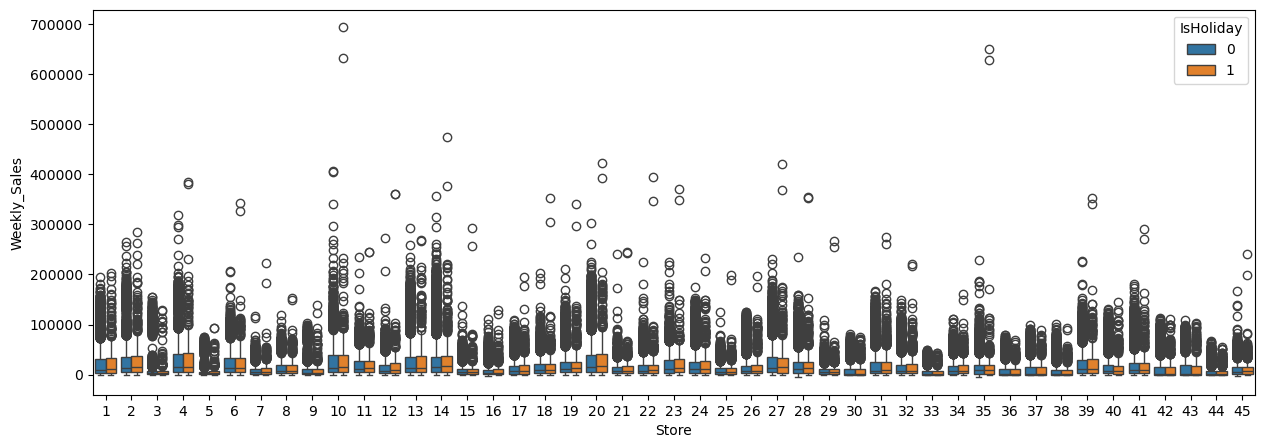

In [7]:
# Box plot of sales data
plt.figure(figsize=(15,5))
sns.boxplot(data=w_sales, x="Store", y="Weekly_Sales", hue="IsHoliday")

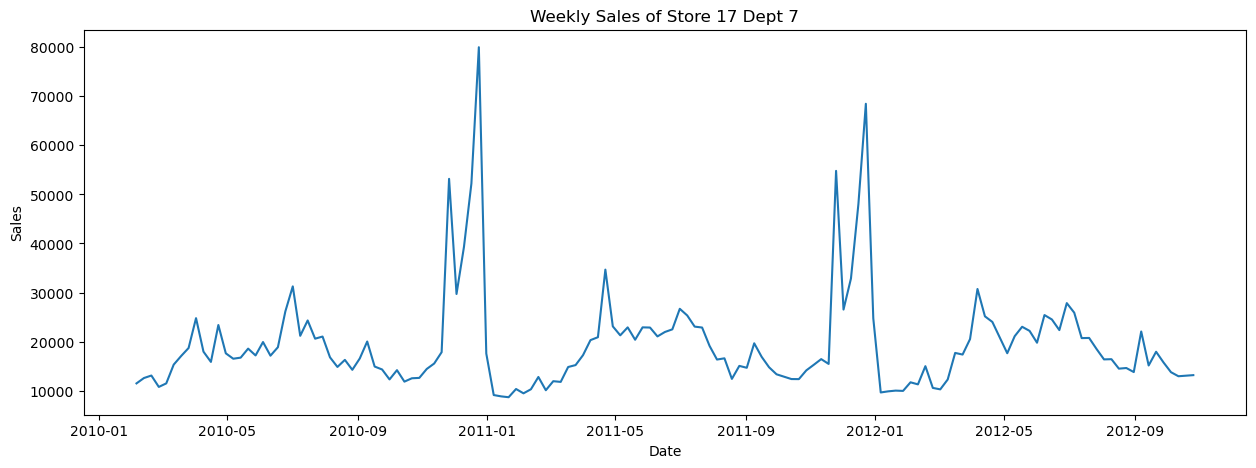

In [8]:
# Function to plot sales of selected store and dept
def plot_sales(n_store, n_dept, data=w_sales):
    """Input the numbers of store and dept, plot the weekly_sales chart of the selected store and dept"""
    selected_data = data[(data['Store'] == n_store) & (data['Dept'] == n_dept)]
    xs = selected_data['Date']
    ys = selected_data['Weekly_Sales']
    plt.figure(figsize=(15,5))
    axes = plt.axes()
    axes.plot(xs, ys)
    axes.set_title(f"Weekly Sales of Store {n_store} Dept {n_dept}")
    axes.set_xlabel("Date")
    axes.set_ylabel("Sales")
    plt.show()

# Plot selected store and dept
plot_sales(17, 7)


#### **1.2 features.csv**

In [9]:
# features.csv
# w_features = pd.read_csv("azureml://")
w_features = pd.read_csv("dataw\\features.csv")
w_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [10]:
w_features.columns.tolist()

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday']

In [11]:
w_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [12]:
# Convert datatype of 'Date' to datetime
w_features['Date'] = pd.to_datetime(w_features['Date'])

# Convert datatype of 'IsHoliday' to int
w_features['IsHoliday'] = w_features['IsHoliday'].astype(int)
w_features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int32
dtype: object

In [13]:
w_features.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,2011-10-31 12:00:00,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,0.071429
min,1.000000,2010-02-05 00:00:00,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,12.000000,2010-12-17 00:00:00,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,0.000000
50%,23.000000,2011-10-31 12:00:00,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,0.000000
75%,34.000000,2012-09-14 00:00:00,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,0.000000
max,45.000000,2013-07-26 00:00:00,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,0.257555


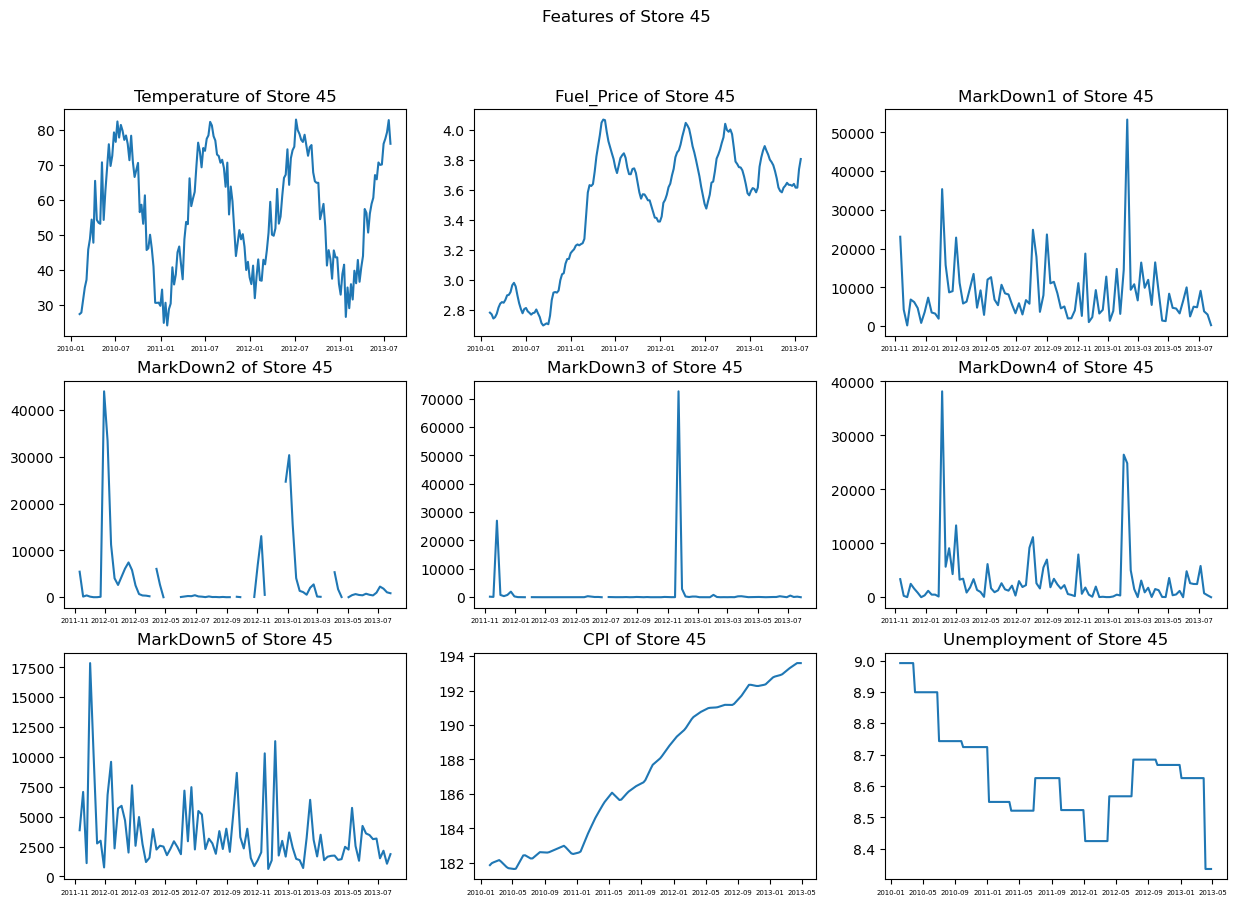

In [14]:
# Function to plot numerical data
def plot_features(n_store, data=w_features):
    """Plot numerical data within selected store"""
    selected_data = data[data['Store'] == n_store]
    
    x_date = selected_data['Date']
    y_temperature = selected_data['Temperature']
    y_fuel_price = selected_data['Fuel_Price']
    y_md1 = selected_data['MarkDown1']
    y_md2 = selected_data['MarkDown2']
    y_md3 = selected_data['MarkDown3']
    y_md4 = selected_data['MarkDown4']
    y_md5 = selected_data['MarkDown5']
    y_cpi = selected_data['CPI']
    y_umemployment = selected_data['Unemployment']
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    axes[0, 0].plot(x_date, y_temperature, label='Temperature')
    axes[0, 0].set_title(f"Temperature of Store {n_store}")
    axes[0, 0].tick_params(axis='x', labelsize=5)
    
    axes[0, 1].plot(x_date, y_fuel_price, label='Fuel_Price')
    axes[0, 1].set_title(f"Fuel_Price of Store {n_store}")
    axes[0, 1].tick_params(axis='x', labelsize=5)

    axes[0, 2].plot(x_date, y_md1, label='MarkDown1')
    axes[0, 2].set_title(f"MarkDown1 of Store {n_store}")
    axes[0, 2].tick_params(axis='x', labelsize=5)

    axes[1, 0].plot(x_date, y_md2, label='MarkDown2')
    axes[1, 0].set_title(f"MarkDown2 of Store {n_store}")
    axes[1, 0].tick_params(axis='x', labelsize=5)

    axes[1, 1].plot(x_date, y_md3, label='MarkDown3')
    axes[1, 1].set_title(f"MarkDown3 of Store {n_store}")
    axes[1, 1].tick_params(axis='x', labelsize=5)

    axes[1, 2].plot(x_date, y_md4, label='MarkDown4')
    axes[1, 2].set_title(f"MarkDown4 of Store {n_store}")
    axes[1, 2].tick_params(axis='x', labelsize=5)

    axes[2, 0].plot(x_date, y_md5, label='MarkDown5')
    axes[2, 0].set_title(f"MarkDown5 of Store {n_store}")
    axes[2, 0].tick_params(axis='x', labelsize=5)
    
    axes[2, 1].plot(x_date, y_cpi, label='CPI')
    axes[2, 1].set_title(f"CPI of Store {n_store}")
    axes[2, 1].tick_params(axis='x', labelsize=5)
    
    axes[2, 2].plot(x_date, y_umemployment, label='Unemployment')
    axes[2, 2].set_title(f"Unemployment of Store {n_store}")
    axes[2, 2].tick_params(axis='x', labelsize=5)

    fig.suptitle(f"Features of Store {n_store}")
    
    plt.show()

# Plot for selected store
plot_features(45)

#### **1.3 stores.csv**

In [15]:
# stores.csv
# w_stores = pd.read_csv("azureml://")
w_stores = pd.read_csv("dataw\stores.csv")
w_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [16]:
w_stores.columns.tolist()

['Store', 'Type', 'Size']

In [17]:
w_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [18]:
# Convert datatype of 'Type' to numerical, using replace
pd.set_option("future.no_silent_downcasting", True)
w_stores["Type"] = w_stores["Type"].replace({"A":0, "B":1, "C":2})
w_stores.head(10)

,Store,Type,Size
0,1,0,151315
1,2,0,202307
2,3,1,37392
3,4,0,205863
4,5,1,34875
5,6,0,202505
6,7,1,70713
7,8,0,155078
8,9,1,125833
9,10,1,126512


In [19]:
# Convert datatype of 'Type' to numerical, using dummy values
w_stores_dummies = pd.get_dummies(w_stores["Type"]).astype(int)
w_stores_upd_dum = pd.concat([w_stores, w_stores_dummies], axis=1)
w_stores_upd_dum = w_stores_upd_dum.drop('Type', axis=1)
w_stores_upd_dum.dtypes

Store    int64
Size     int64
0        int32
1        int32
2        int32
dtype: object

In [20]:
w_stores_upd_dum.describe()

,Store,Size,0,1,2
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,130287.600000,0.488889,0.377778,0.133333
std,13.133926,63825.271991,0.505525,0.490310,0.343776
min,1.000000,34875.000000,0.000000,0.000000,0.000000
25%,12.000000,70713.000000,0.000000,0.000000,0.000000
50%,23.000000,126512.000000,0.000000,0.000000,0.000000
75%,34.000000,202307.000000,1.000000,1.000000,0.000000
max,45.000000,219622.000000,1.000000,1.000000,1.000000


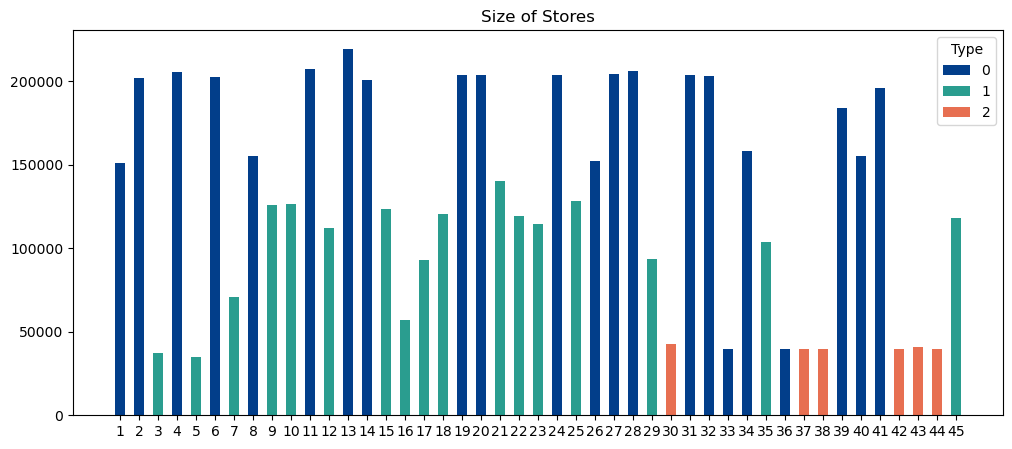

In [21]:
# Box plot of store size, using original w_stores dataset
# Assign colors to types
colors = {0: '#023e8a', 1: '#2a9d8f', 2: '#e76f51'}
w_stores["Color"] = w_stores["Type"].map(colors)

# Plot each store size for its type
plt.figure(figsize=(12,5))
axes = plt.axes()
for tp, cl in colors.items():
    temp = w_stores[w_stores['Type'] == tp]
    axes.bar(temp["Store"], temp["Size"], color=cl, label=tp, width=0.5)

axes.set_xticks(w_stores["Store"])
axes.set_xticklabels(w_stores["Store"])
axes.set_title("Size of Stores")
axes.legend(title="Type")
plt.show()

### **2. Visualize data**

#### **2.1 sales.csv**

In [38]:
# Extract Year, Month and Day
w_sales["Year"] = w_sales["Date"].dt.year
w_sales["Month"] = w_sales["Date"].dt.month
w_sales["Day"] = w_sales["Date"].dt.day
w_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day
0,1,1,2010-02-05,24924.50,0,2010,2,5
1,1,1,2010-02-12,46039.49,1,2010,2,12
2,1,1,2010-02-19,41595.55,0,2010,2,19
3,1,1,2010-02-26,19403.54,0,2010,2,26
4,1,1,2010-03-05,21827.90,0,2010,3,5
...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2012,9,28
421566,45,98,2012-10-05,628.10,0,2012,10,5
421567,45,98,2012-10-12,1061.02,0,2012,10,12
421568,45,98,2012-10-19,760.01,0,2012,10,19


##### **Plot Weekly Sales, Comparing if IsHoliday**

In [39]:
# Extract data with IsHoliday is True(1)
w_sales_holiday = w_sales[w_sales["IsHoliday"] == 1]
w_sales_holiday_weekly = w_sales_holiday.groupby('Date').agg({'Weekly_Sales': 'sum'}).reset_index()
w_sales_holiday_weekly

,Date,Weekly_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [24]:
# Extract data with IsHoliday is False(0)
w_sales_not_holiday = w_sales[w_sales["IsHoliday"] == 0]
w_sales_not_holiday_weekly = w_sales_not_holiday.groupby('Date').agg({'Weekly_Sales': 'sum'}).reset_index()
w_sales_not_holiday_weekly

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-19,48276993.78
2,2010-02-26,43968571.13
3,2010-03-05,46871470.30
4,2010-03-12,45925396.51
...,...,...
128,2012-09-28,43734899.40
129,2012-10-05,47566639.31
130,2012-10-12,46128514.25
131,2012-10-19,45122410.57


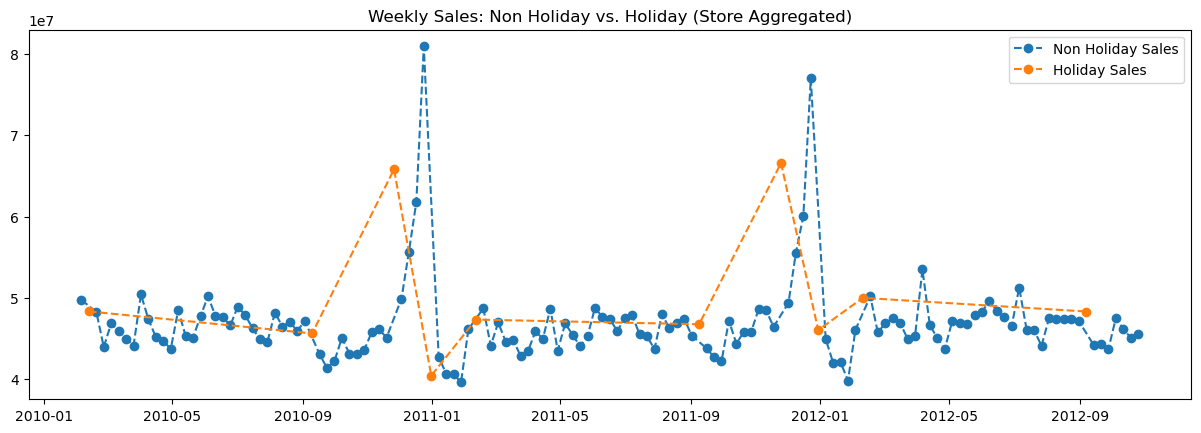

In [40]:
plt.figure().set_figwidth(15)
axes = plt.axes()
axes.plot(w_sales_not_holiday_weekly["Date"], w_sales_not_holiday_weekly["Weekly_Sales"], marker='o', linestyle='--', label='Non Holiday Sales')
axes.plot(w_sales_holiday_weekly["Date"], w_sales_holiday_weekly["Weekly_Sales"], marker='o', linestyle='--', label='Holiday Sales')
axes.set_title("Weekly Sales: Non Holiday vs. Holiday (Store Aggregated)")
axes.legend()
plt.show()

##### **Plot Monthly Sales**

In [41]:
# Aggregate monthly sales
w_monthly_sales = w_sales.groupby(['Year', 'Month']).agg({'Weekly_Sales': 'sum'}).reset_index()
w_monthly_sales.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)
w_monthly_sales["Time"] = w_monthly_sales["Year"].astype(str) + '-' + w_monthly_sales["Month"].astype(str)
w_monthly_sales["Time"] = pd.to_datetime(w_monthly_sales["Time"])
w_monthly_sales

,Year,Month,Monthly_Sales,Time
0,2010,2,1.903330e+08,2010-02-01
1,2010,3,1.819198e+08,2010-03-01
2,2010,4,2.314124e+08,2010-04-01
3,2010,5,1.867109e+08,2010-05-01
4,2010,6,1.922462e+08,2010-06-01
5,2010,7,2.325801e+08,2010-07-01
6,2010,8,1.876401e+08,2010-08-01
7,2010,9,1.772679e+08,2010-09-01
8,2010,10,2.171618e+08,2010-10-01
9,2010,11,2.028534e+08,2010-11-01


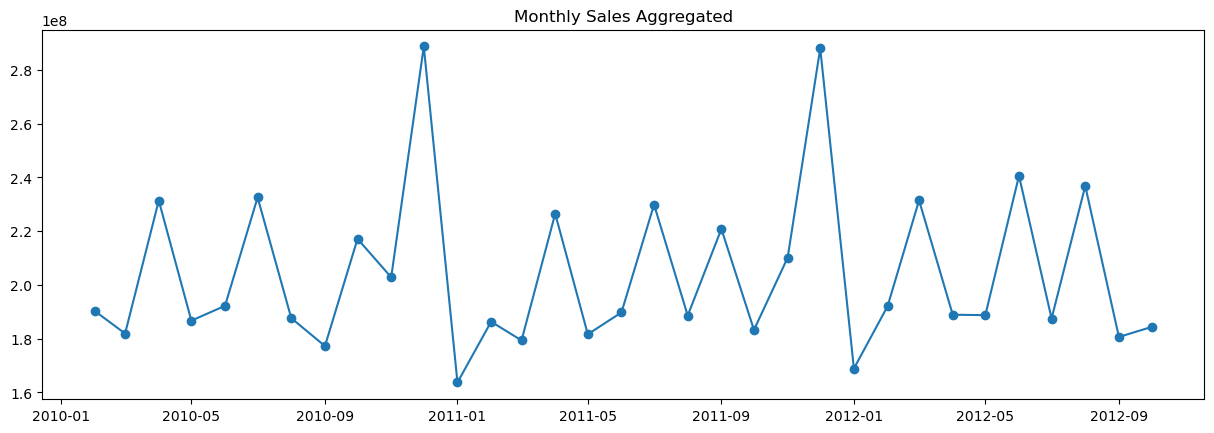

In [42]:
plt.figure().set_figwidth(15)
axes = plt.axes()
axes.plot(w_monthly_sales["Time"], w_monthly_sales["Monthly_Sales"], marker='o')
axes.set_title("Monthly Sales Aggregated")
plt.show()

##### **Plot Yearly Sales**

In [43]:
# Aggregate yearly sales
w_yearly_sales = w_sales.groupby('Year').agg({'Weekly_Sales': 'sum'}).reset_index()
w_yearly_sales.rename(columns={'Weekly_Sales': 'Yearly_Sales'}, inplace=True)
w_yearly_sales

,Year,Yearly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


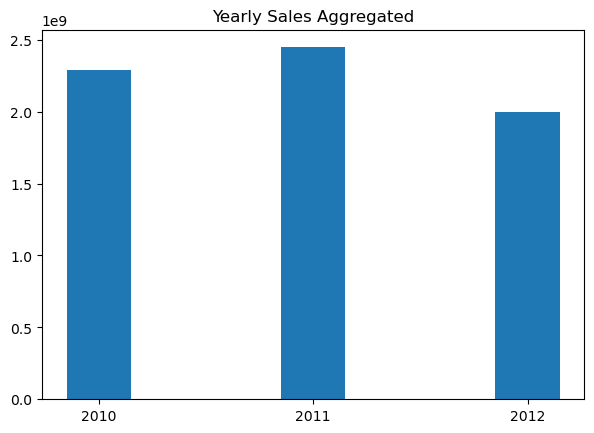

In [44]:
plt.figure().set_figwidth(7)
axes = plt.axes()
axes.bar(w_yearly_sales["Year"], w_yearly_sales["Yearly_Sales"], width=0.3)
axes.set_xticks(w_yearly_sales["Year"])
axes.set_title("Yearly Sales Aggregated")
plt.show()

#### **2.2 features.csv**

##### **Plot Mean Values of Features Weekly, Comparing if IsHoliday**

In [45]:
# Extract data with IsHoliday is True(1)
w_features_holiday = w_features[w_features["IsHoliday"] == 1]
w_features_holiday

w_features_holiday_weekly = w_features_holiday.groupby('Date').agg({'Temperature': 'mean',
                                                                    'Fuel_Price': 'mean',
                                                                    'MarkDown1': 'mean',
                                                                    'MarkDown2': 'mean',
                                                                    'MarkDown3': 'mean',
                                                                    'MarkDown4': 'mean',
                                                                    'MarkDown5': 'mean',
                                                                    'CPI': 'mean',
                                                                    'Unemployment': 'mean',}).reset_index()
w_features_holiday_weekly.rename(columns={'Temperature': 'AVG_Temperature',
                                          'Fuel_Price': 'AVG_Fuel_Price',
                                          'MarkDown1': 'AVG_MarkDown1',
                                          'MarkDown2': 'AVG_MarkDown2',
                                          'MarkDown3': 'AVG_MarkDown3',
                                          'MarkDown4': 'AVG_MarkDown4',
                                          'MarkDown5': 'AVG_MarkDown5',
                                          'CPI': 'AVG_CPI',
                                          'Unemployment': 'AVG_Unemployment',}, inplace=True)
w_features_holiday_weekly

,Date,AVG_Temperature,AVG_Fuel_Price,AVG_MarkDown1,AVG_MarkDown2,AVG_MarkDown3,AVG_MarkDown4,AVG_MarkDown5,AVG_CPI,AVG_Unemployment
0,2010-02-12,34.151333,2.694022,NaN,NaN,NaN,NaN,NaN,167.825608,8.619311
1,2010-09-10,72.449778,2.721356,NaN,NaN,NaN,NaN,NaN,168.228792,8.428578
2,2010-11-26,47.889556,2.917956,NaN,NaN,NaN,NaN,NaN,168.541611,8.475289
3,2010-12-31,36.782667,3.048222,NaN,NaN,NaN,NaN,NaN,168.522268,8.475289
4,2011-02-11,32.159111,3.162400,NaN,NaN,NaN,NaN,NaN,169.500283,8.291200
5,2011-09-09,73.447556,3.681956,NaN,NaN,NaN,NaN,NaN,172.095478,8.097489
6,2011-11-25,49.627556,3.434311,556.328636,209.536857,60007.649500,70.310286,1847.119556,173.409555,7.804222
7,2011-12-30,37.926222,3.271067,3888.336444,39351.596444,171.726500,657.491778,2531.392667,173.991933,7.804222
8,2012-02-10,39.848000,3.500800,10759.190222,4403.054545,70.628667,10639.296316,5796.337778,174.550920,7.508333
9,2012-09-07,78.038667,3.842556,8477.294667,33.859697,78.759091,2042.328571,3421.680889,176.014468,7.237333


In [31]:
# Extract data with IsHoliday is False(0)
w_features_not_holiday = w_features[w_features["IsHoliday"] == 0]
w_features_not_holiday

w_features_not_holiday_weekly = w_features_not_holiday.groupby('Date').agg({'Temperature': 'mean',
                                                                            'Fuel_Price': 'mean',
                                                                            'MarkDown1': 'mean',
                                                                            'MarkDown2': 'mean',
                                                                            'MarkDown3': 'mean',
                                                                            'MarkDown4': 'mean',
                                                                            'MarkDown5': 'mean',
                                                                            'CPI': 'mean',
                                                                            'Unemployment': 'mean',}).reset_index()
w_features_not_holiday_weekly.rename(columns={'Temperature': 'AVG_Temperature',
                                              'Fuel_Price': 'AVG_Fuel_Price',
                                              'MarkDown1': 'AVG_MarkDown1',
                                              'MarkDown2': 'AVG_MarkDown2',
                                              'MarkDown3': 'AVG_MarkDown3',
                                              'MarkDown4': 'AVG_MarkDown4',
                                              'MarkDown5': 'AVG_MarkDown5',
                                              'CPI': 'AVG_CPI',
                                              'Unemployment': 'AVG_Unemployment',}, inplace=True)
w_features_not_holiday_weekly

,Date,AVG_Temperature,AVG_Fuel_Price,AVG_MarkDown1,AVG_MarkDown2,AVG_MarkDown3,AVG_MarkDown4,AVG_MarkDown5,AVG_CPI,AVG_Unemployment
0,2010-02-05,34.037333,2.717844,NaN,NaN,NaN,NaN,NaN,167.730885,8.619311
1,2010-02-19,37.719778,2.672067,NaN,NaN,NaN,NaN,NaN,167.871686,8.619311
2,2010-02-26,39.243556,2.683933,NaN,NaN,NaN,NaN,NaN,167.909657,8.619311
3,2010-03-05,42.917333,2.731200,NaN,NaN,NaN,NaN,NaN,167.947628,8.619311
4,2010-03-12,47.432444,2.774422,NaN,NaN,NaN,NaN,NaN,167.985598,8.619311
...,...,...,...,...,...,...,...,...,...,...
164,2013-06-28,79.871111,3.629400,4905.673333,766.902703,23.950385,3831.422703,3771.952889,NaN,NaN
165,2013-07-05,79.655778,3.583533,8197.936444,2192.764054,626.819070,8357.932564,2389.641333,NaN,NaN
166,2013-07-12,80.798667,3.568111,3962.768444,1259.823947,71.435814,2322.072703,2891.560222,NaN,NaN
167,2013-07-19,79.268667,3.683444,2607.699333,924.923158,142.733000,1034.775526,1893.073333,NaN,NaN


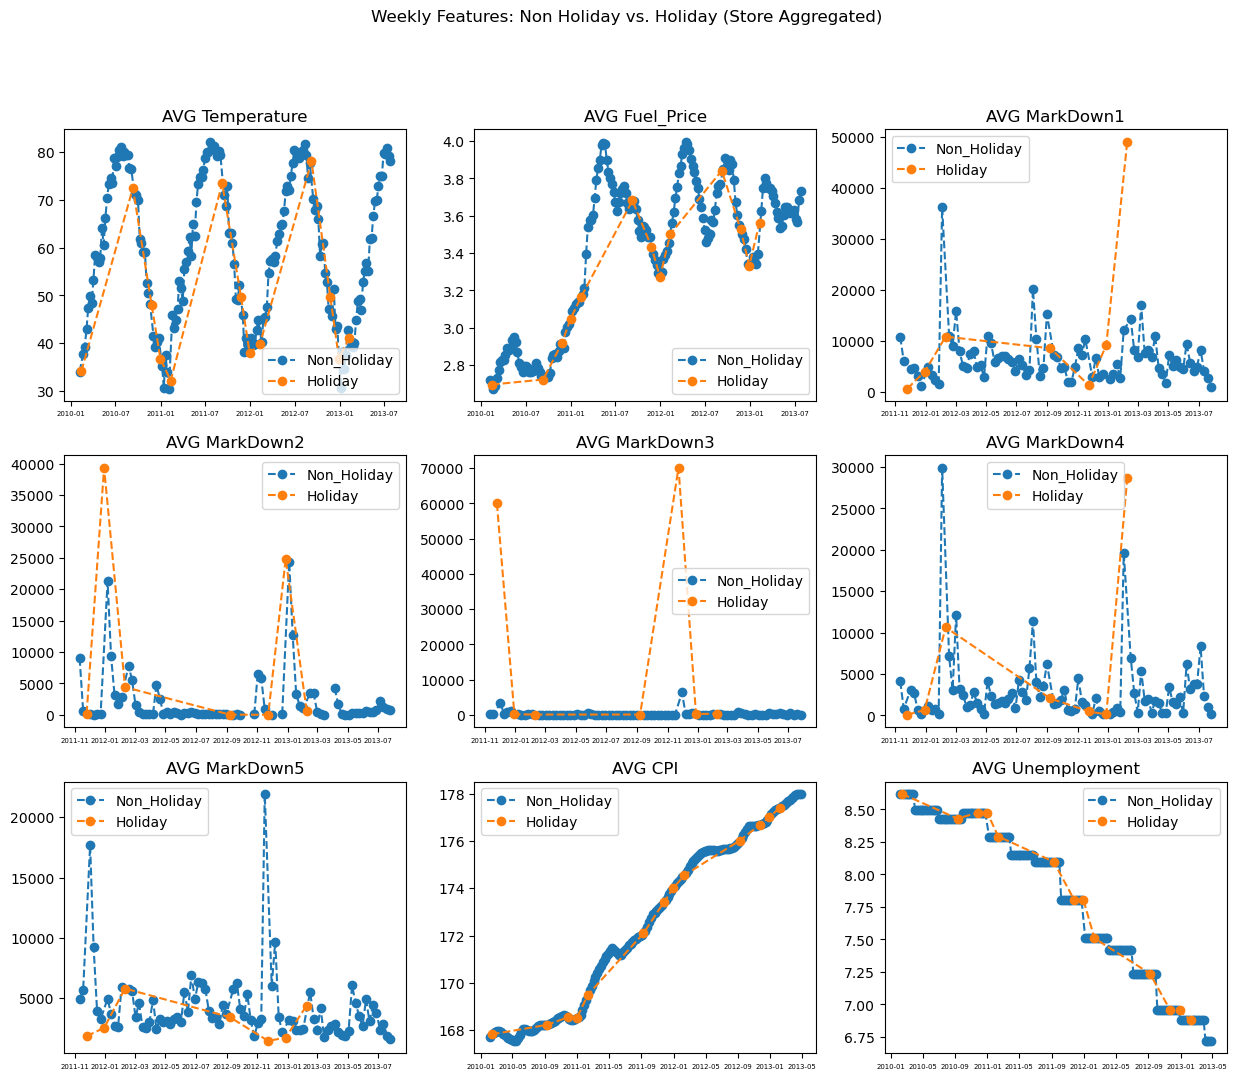

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

axes[0, 0].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_Temperature"], marker='o', linestyle='--', label='Non_Holiday')
axes[0, 0].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_Temperature"], marker='o', linestyle='--', label='Holiday')
axes[0, 0].set_title(f"AVG Temperature")
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', labelsize=5)

axes[0, 1].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_Fuel_Price"], marker='o', linestyle='--', label='Non_Holiday')
axes[0, 1].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_Fuel_Price"], marker='o', linestyle='--', label='Holiday')
axes[0, 1].set_title(f"AVG Fuel_Price")
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', labelsize=5)

axes[0, 2].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_MarkDown1"], marker='o', linestyle='--', label='Non_Holiday')
axes[0, 2].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_MarkDown1"], marker='o', linestyle='--', label='Holiday')
axes[0, 2].set_title(f"AVG MarkDown1")
axes[0, 2].legend()
axes[0, 2].tick_params(axis='x', labelsize=5)

axes[1, 0].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_MarkDown2"], marker='o', linestyle='--', label='Non_Holiday')
axes[1, 0].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_MarkDown2"], marker='o', linestyle='--', label='Holiday')
axes[1, 0].set_title(f"AVG MarkDown2")
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', labelsize=5)

axes[1, 1].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_MarkDown3"], marker='o', linestyle='--', label='Non_Holiday')
axes[1, 1].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_MarkDown3"], marker='o', linestyle='--', label='Holiday')
axes[1, 1].set_title(f"AVG MarkDown3")
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', labelsize=5)

axes[1, 2].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_MarkDown4"], marker='o', linestyle='--', label='Non_Holiday')
axes[1, 2].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_MarkDown4"], marker='o', linestyle='--', label='Holiday')
axes[1, 2].set_title(f"AVG MarkDown4")
axes[1, 2].legend()
axes[1, 2].tick_params(axis='x', labelsize=5)

axes[2, 0].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_MarkDown5"], marker='o', linestyle='--', label='Non_Holiday')
axes[2, 0].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_MarkDown5"], marker='o', linestyle='--', label='Holiday')
axes[2, 0].set_title(f"AVG MarkDown5")
axes[2, 0].legend()
axes[2, 0].tick_params(axis='x', labelsize=5)

axes[2, 1].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_CPI"], marker='o', linestyle='--', label='Non_Holiday')
axes[2, 1].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_CPI"], marker='o', linestyle='--', label='Holiday')
axes[2, 1].set_title(f"AVG CPI")
axes[2, 1].legend()
axes[2, 1].tick_params(axis='x', labelsize=5)

axes[2, 2].plot(w_features_not_holiday_weekly["Date"], w_features_not_holiday_weekly["AVG_Unemployment"], marker='o', linestyle='--', label='Non_Holiday')
axes[2, 2].plot(w_features_holiday_weekly["Date"], w_features_holiday_weekly["AVG_Unemployment"], marker='o', linestyle='--', label='Holiday')
axes[2, 2].set_title(f"AVG Unemployment")
axes[2, 2].legend()
axes[2, 2].tick_params(axis='x', labelsize=5)

fig.suptitle(f"Weekly Features: Non Holiday vs. Holiday (Store Aggregated)")

plt.show()

#### **2.3 stores.csv**

<Axes: xlabel='Type', ylabel='Size'>

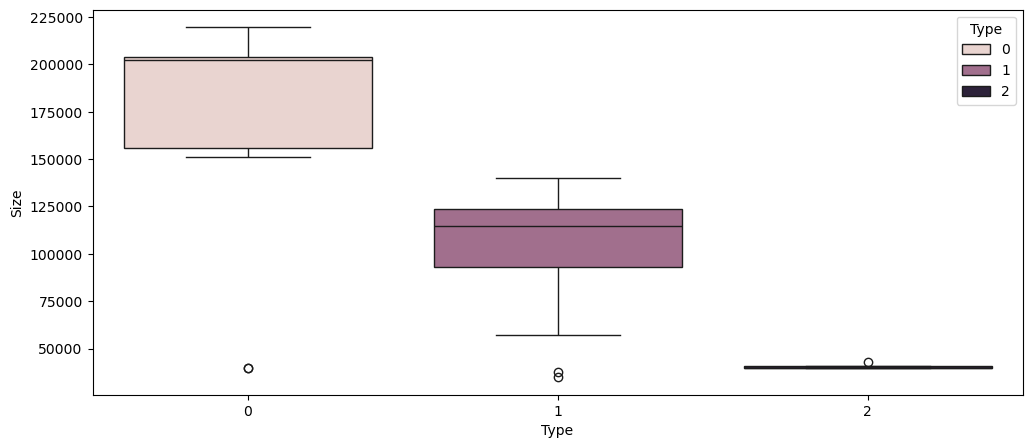

In [47]:
# Box plot of store size depending on the three types, using original w_stores dataset
plt.figure(figsize=(12,5))
sns.boxplot(data=w_stores, y="Size", x="Type", hue="Type", legend="full")

### **3. Clean data**

#### **3.1 Join Dataframes**

In [48]:
# Merge w_sales, w_features, and w_stores
merged_mid_1 = pd.merge(w_sales, w_features, how="left", on=["Store", "Date"])
merged_mid_2 = pd.merge(merged_mid_1, w_stores, how="left", on="Store")
merged_mid_2

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year,Month,Day,Temperature,Fuel_Price,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Color
0,1,1,2010-02-05,24924.50,0,2010,2,5,42.31,2.572,...,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,151315,#023e8a
1,1,1,2010-02-12,46039.49,1,2010,2,12,38.51,2.548,...,NaN,NaN,NaN,NaN,211.242170,8.106,1,0,151315,#023e8a
2,1,1,2010-02-19,41595.55,0,2010,2,19,39.93,2.514,...,NaN,NaN,NaN,NaN,211.289143,8.106,0,0,151315,#023e8a
3,1,1,2010-02-26,19403.54,0,2010,2,26,46.63,2.561,...,NaN,NaN,NaN,NaN,211.319643,8.106,0,0,151315,#023e8a
4,1,1,2010-03-05,21827.90,0,2010,3,5,46.50,2.625,...,NaN,NaN,NaN,NaN,211.350143,8.106,0,0,151315,#023e8a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2012,9,28,64.88,3.997,...,20.64,1.50,1601.01,3288.25,192.013558,8.684,0,1,118221,#2a9d8f
421566,45,98,2012-10-05,628.10,0,2012,10,5,64.89,3.985,...,NaN,18.82,2253.43,2340.01,192.170412,8.667,0,1,118221,#2a9d8f
421567,45,98,2012-10-12,1061.02,0,2012,10,12,54.47,4.000,...,NaN,7.89,599.32,3990.54,192.327265,8.667,0,1,118221,#2a9d8f
421568,45,98,2012-10-19,760.01,0,2012,10,19,56.47,3.969,...,NaN,3.18,437.73,1537.49,192.330854,8.667,0,1,118221,#2a9d8f


In [49]:
# Test if merged correctly
test = merged_mid_2["IsHoliday_x"] == merged_mid_2["IsHoliday_y"]
test.unique()

array([ True])

In [50]:
# Drop unnecessary columns, rename and reorder columns
merged_final = merged_mid_2.drop(["IsHoliday_y", "Color"], axis=1)
merged_final.rename(columns={"IsHoliday_x": "IsHoliday"}, inplace=True)
merged_final = merged_final.reindex(columns=["Store",	
                                             "Dept",	
                                             "Date",	
                                             "Year",	
                                             "Month",
                                             "Day",
                                             "IsHoliday",
                                             "Temperature",	
                                             "Fuel_Price",	
                                             "CPI",
                                             "Unemployment",	
                                             "Type",	
                                             "Size",
                                             "MarkDown1",	
                                             "MarkDown2",	
                                             "MarkDown3",	
                                             "MarkDown4",	
                                             "MarkDown5",	
                                             "Weekly_Sales",])
merged_final

,Store,Dept,Date,Year,Month,Day,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales
0,1,1,2010-02-05,2010,2,5,0,42.31,2.572,211.096358,8.106,0,151315,NaN,NaN,NaN,NaN,NaN,24924.50
1,1,1,2010-02-12,2010,2,12,1,38.51,2.548,211.242170,8.106,0,151315,NaN,NaN,NaN,NaN,NaN,46039.49
2,1,1,2010-02-19,2010,2,19,0,39.93,2.514,211.289143,8.106,0,151315,NaN,NaN,NaN,NaN,NaN,41595.55
3,1,1,2010-02-26,2010,2,26,0,46.63,2.561,211.319643,8.106,0,151315,NaN,NaN,NaN,NaN,NaN,19403.54
4,1,1,2010-03-05,2010,3,5,0,46.50,2.625,211.350143,8.106,0,151315,NaN,NaN,NaN,NaN,NaN,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,2012,9,28,0,64.88,3.997,192.013558,8.684,1,118221,4556.61,20.64,1.50,1601.01,3288.25,508.37
421566,45,98,2012-10-05,2012,10,5,0,64.89,3.985,192.170412,8.667,1,118221,5046.74,NaN,18.82,2253.43,2340.01,628.10
421567,45,98,2012-10-12,2012,10,12,0,54.47,4.000,192.327265,8.667,1,118221,1956.28,NaN,7.89,599.32,3990.54,1061.02
421568,45,98,2012-10-19,2012,10,19,0,56.47,3.969,192.330854,8.667,1,118221,2004.02,NaN,3.18,437.73,1537.49,760.01


In [51]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Year          421570 non-null  int32         
 4   Month         421570 non-null  int32         
 5   Day           421570 non-null  int32         
 6   IsHoliday     421570 non-null  int32         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  Type          421570 non-null  object        
 12  Size          421570 non-null  int64         
 13  MarkDown1     150681 non-null  float64       
 14  MarkDown2     111248 non-null  float64       
 15  MarkDown3     137

#### **3.2 Deal with Missing Values**

In [52]:
# Drop variables with lots of missing values
cleaned_mid_1 = merged_final.drop(["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], axis=1)
cleaned_mid_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Year          421570 non-null  int32         
 4   Month         421570 non-null  int32         
 5   Day           421570 non-null  int32         
 6   IsHoliday     421570 non-null  int32         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  Type          421570 non-null  object        
 12  Size          421570 non-null  int64         
 13  Weekly_Sales  421570 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(4), int64(3), object(1)
memo

#### **3.3 Deal with Outliers**

Text(0.5, 1.0, 'Size')

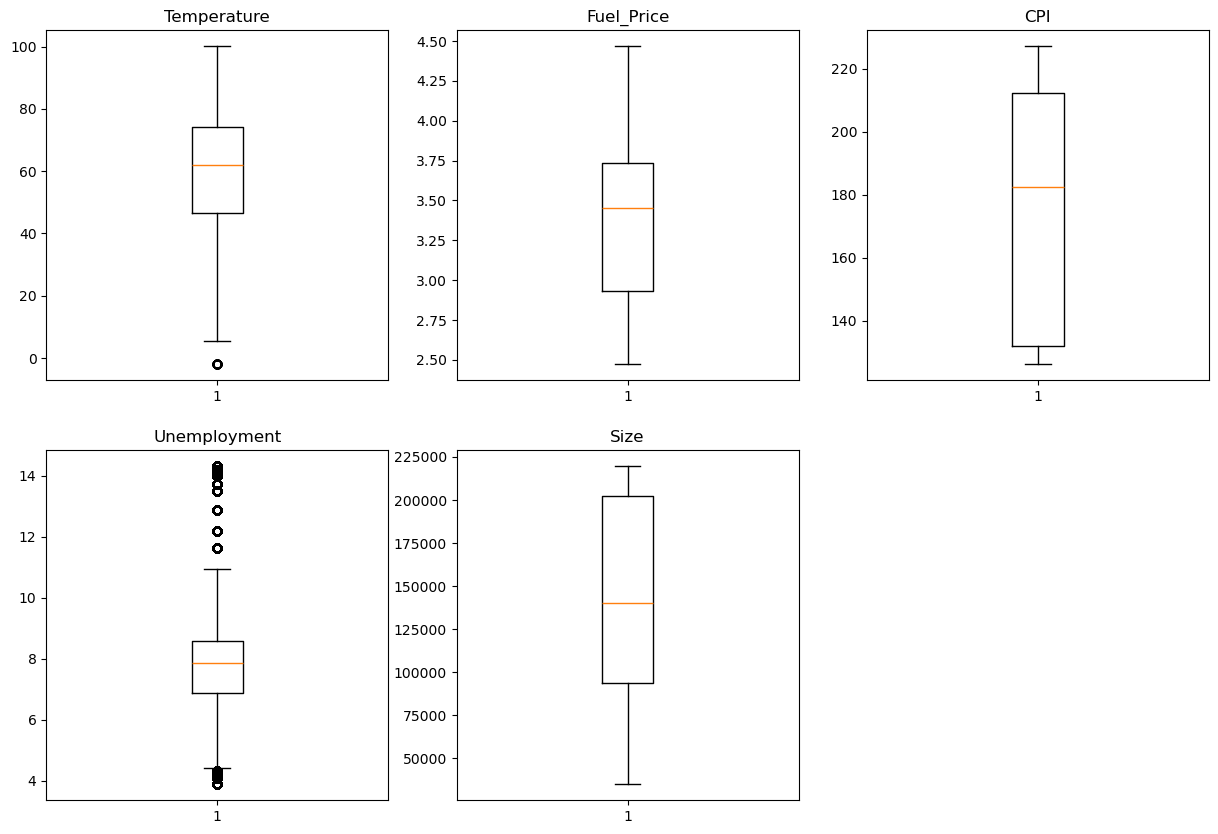

In [53]:
# Identify outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.delaxes(axes[1, 2])

axes[0, 0].boxplot(cleaned_mid_1["Temperature"])
axes[0, 0].set_title("Temperature")

axes[0, 1].boxplot(cleaned_mid_1["Fuel_Price"])
axes[0, 1].set_title("Fuel_Price")

axes[0, 2].boxplot(cleaned_mid_1["CPI"])
axes[0, 2].set_title("CPI")

axes[1, 0].boxplot(cleaned_mid_1["Unemployment"])
axes[1, 0].set_title("Unemployment")

axes[1, 1].boxplot(cleaned_mid_1["Size"])
axes[1, 1].set_title("Size")

We can see that, the "Temperature" and "Unemployment" columns have outliers.

In [54]:
# Find outliers in "Temperature"
Q1 = cleaned_mid_1["Temperature"].quantile(0.25)
Q3 = cleaned_mid_1["Temperature"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_array_tpt = np.where(cleaned_mid_1["Temperature"] <= lower)[0]
upper_array_tpt = np.where(cleaned_mid_1["Temperature"] >= upper)[0]

print(f"Index of lower outliers: {len(lower_array_tpt)}\n{lower_array_tpt}")
print("----------------------------------------")
print(f"Index of upper outliers: {len(upper_array_tpt)}\n{upper_array_tpt}")

Index of lower outliers: 69
[59052 59195 59338 59481 59624 59767 59910 60053 60196 60339 60482 60625
 60768 60911 61054 61197 61323 61425 61487 61630 61773 61916 62059 62202
 62345 62488 62631 62774 62917 63060 63203 63346 63489 63632 63775 63918
 64061 64204 64347 64490 64718 64919 65075 65217 65343 65486 65615 65729
 65846 65989 66132 66275 66418 66566 66701 66844 66987 67127 67270 67413
 67556 67699 67842 67985 68120 68243 68386 68529 68670]
----------------------------------------
Index of upper outliers: 0
[]


In [55]:
# Find outliers in "Unemployment"
Q1 = cleaned_mid_1["Unemployment"].quantile(0.25)
Q3 = cleaned_mid_1["Unemployment"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower_array_uemp = np.where(cleaned_mid_1["Unemployment"] <= lower)[0]
upper_array_uemp = np.where(cleaned_mid_1["Unemployment"] >= upper)[0]

print(f"Index of lower outliers: {len(lower_array_uemp)}\n{lower_array_uemp}")
print("----------------------------------------")
print(f"Index of upper outliers: {len(upper_array_uemp)}\n{upper_array_uemp}")

Index of lower outliers: 8197
[ 29631  29632  29633 ... 380969 380970 380971]
----------------------------------------
Index of upper outliers: 23917
[107901 107902 107903 ... 361057 361058 361076]


In [56]:
# Check if there are rows being outliers of "Temperature" and "Unemployment"
out = []
for i in lower_array_tpt:
    if i in lower_array_uemp or i in upper_array_uemp:
        out.append(i)
out

[]

There is none.

In [57]:
# Drop the rows with outliers
cleaned_mid_2 = cleaned_mid_1.drop(index=np.concatenate([lower_array_tpt, lower_array_uemp, upper_array_uemp]), axis=0)
cleaned_mid_2

,Store,Dept,Date,Year,Month,Day,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,2010-02-05,2010,2,5,0,42.31,2.572,211.096358,8.106,0,151315,24924.50
1,1,1,2010-02-12,2010,2,12,1,38.51,2.548,211.242170,8.106,0,151315,46039.49
2,1,1,2010-02-19,2010,2,19,0,39.93,2.514,211.289143,8.106,0,151315,41595.55
3,1,1,2010-02-26,2010,2,26,0,46.63,2.561,211.319643,8.106,0,151315,19403.54
4,1,1,2010-03-05,2010,3,5,0,46.50,2.625,211.350143,8.106,0,151315,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,2012,9,28,0,64.88,3.997,192.013558,8.684,1,118221,508.37
421566,45,98,2012-10-05,2012,10,5,0,64.89,3.985,192.170412,8.667,1,118221,628.10
421567,45,98,2012-10-12,2012,10,12,0,54.47,4.000,192.327265,8.667,1,118221,1061.02
421568,45,98,2012-10-19,2012,10,19,0,56.47,3.969,192.330854,8.667,1,118221,760.01


In [58]:
cleaned_mid_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389387 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         389387 non-null  int64         
 1   Dept          389387 non-null  int64         
 2   Date          389387 non-null  datetime64[ns]
 3   Year          389387 non-null  int32         
 4   Month         389387 non-null  int32         
 5   Day           389387 non-null  int32         
 6   IsHoliday     389387 non-null  int32         
 7   Temperature   389387 non-null  float64       
 8   Fuel_Price    389387 non-null  float64       
 9   CPI           389387 non-null  float64       
 10  Unemployment  389387 non-null  float64       
 11  Type          389387 non-null  object        
 12  Size          389387 non-null  int64         
 13  Weekly_Sales  389387 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(4), int64(3), object(1)
memory us

#### **3.4 Identify Imbalanced data**

Type is the categorical column that describes the type of stores. Firstly, I plot the data distribution of the three classes.

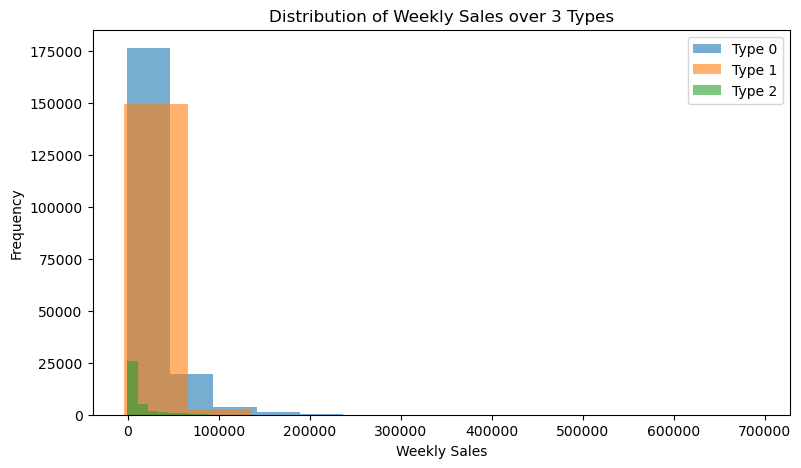

In [59]:
plt.figure(figsize=(9, 5))
axes = plt.axes()
axes.hist(cleaned_mid_2[cleaned_mid_2["Type"] == 0]["Weekly_Sales"], alpha=0.6, label='Type 0')
axes.hist(cleaned_mid_2[cleaned_mid_2["Type"] == 1]["Weekly_Sales"], alpha=0.6, label='Type 1')
axes.hist(cleaned_mid_2[cleaned_mid_2["Type"] == 2]["Weekly_Sales"], alpha=0.6, label='Type 2')
axes.set_title("Distribution of Weekly Sales over 3 Types")
axes.set_xlabel("Weekly Sales")
axes.set_ylabel("Frequency")
axes.legend()
plt.show()

Clearly, the type 2 data (originally Type C, color green) is imbalanced.
But since imbalance lies in different types, and it is very challenging to deal with imbalance in time series data, because it is hard to oversample/undersample data without concerning about date, I will look into the correlation before deciding how to deal with imbalance.

### **4. Identify correlated variables**

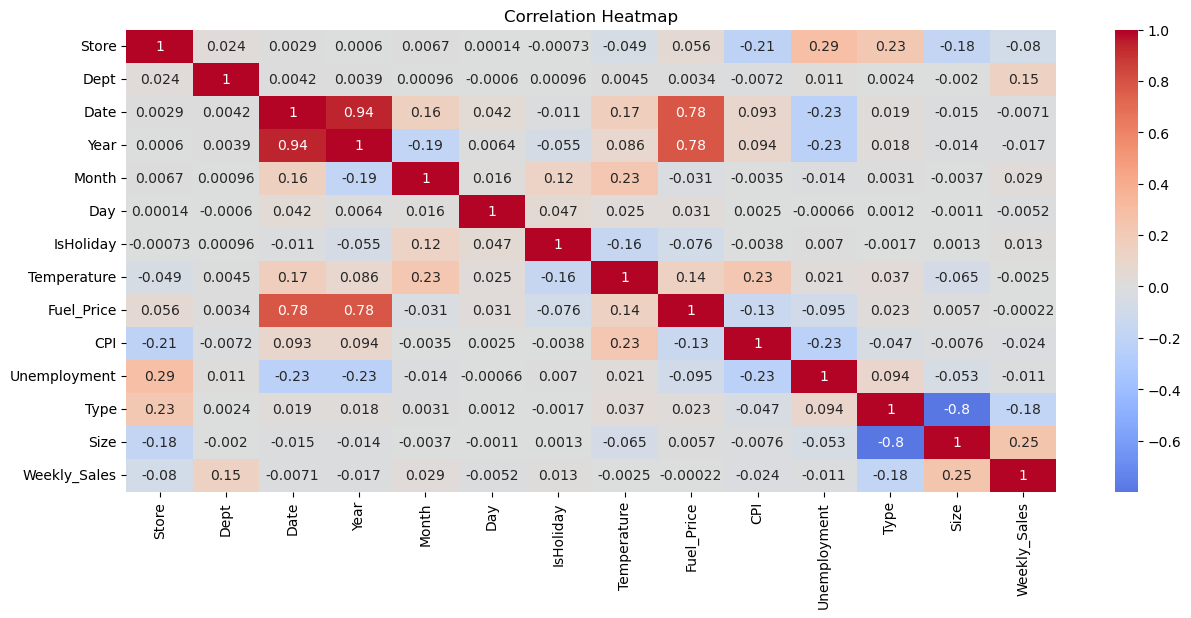

In [60]:
# Calculate correlation values
corr_matrix = cleaned_mid_2.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# Set thresold as 0.7, print out high-correlated variable pairs
threshold = 0.7

high_corr_var = []
for i in range(len(corr_matrix)):
    for j in range(i + 1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            high_corr_var.append((corr_matrix.index[i], corr_matrix.columns[j]))
high_corr_var

[('Date', 'Year'),
 ('Date', 'Fuel_Price'),
 ('Year', 'Fuel_Price'),
 ('Type', 'Size')]

- Year aare extracted from Date, and it will be useful for modeling, so I will keep it.
- Fuel_Price is highly correlated with Date and Year. Since Date is essential in further prediction, then Fuel_Price can be dropped.
- For Type and Size, since Type is actually categorical and Size is continuous int64, it is better to keep Size.

In [62]:
# Drop Fuel_Price and Type
cleaned_mid_3 = cleaned_mid_2.drop(["Fuel_Price", "Type"], axis=1)
cleaned_mid_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389387 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         389387 non-null  int64         
 1   Dept          389387 non-null  int64         
 2   Date          389387 non-null  datetime64[ns]
 3   Year          389387 non-null  int32         
 4   Month         389387 non-null  int32         
 5   Day           389387 non-null  int32         
 6   IsHoliday     389387 non-null  int32         
 7   Temperature   389387 non-null  float64       
 8   CPI           389387 non-null  float64       
 9   Unemployment  389387 non-null  float64       
 10  Size          389387 non-null  int64         
 11  Weekly_Sales  389387 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(4), int64(3)
memory usage: 32.7 MB


In [63]:
# Check data integrity
n_store = len(cleaned_mid_3["Store"].unique())
print(f"Number of Unique Stores: {n_store}")

n_date = len(cleaned_mid_3["Date"].unique())
print(f"Number of Unique Dates: {n_date}")

n_size = len(cleaned_mid_3["Size"].unique())
print(f"Number of Unique Sizes: {n_size}")

Number of Unique Stores: 45
Number of Unique Dates: 143
Number of Unique Sizes: 40


In [64]:
# Reset index
cleaned_mid_4 = cleaned_mid_3.reset_index(drop=True)
cleaned_mid_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389387 entries, 0 to 389386
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         389387 non-null  int64         
 1   Dept          389387 non-null  int64         
 2   Date          389387 non-null  datetime64[ns]
 3   Year          389387 non-null  int32         
 4   Month         389387 non-null  int32         
 5   Day           389387 non-null  int32         
 6   IsHoliday     389387 non-null  int32         
 7   Temperature   389387 non-null  float64       
 8   CPI           389387 non-null  float64       
 9   Unemployment  389387 non-null  float64       
 10  Size          389387 non-null  int64         
 11  Weekly_Sales  389387 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(4), int64(3)
memory usage: 29.7 MB


In [65]:
# One hot encoding for IsHoliday column
cleaned_dummies = pd.get_dummies(cleaned_mid_4["IsHoliday"]).astype(int)
cleaned = pd.concat([cleaned_mid_4, cleaned_dummies], axis=1)

# Rename One hot encoding columns
cleaned.rename(columns={0: "IsHoliday_False", 1: "IsHoliday_True"}, inplace=True)

# Reorder columns
cleaned = cleaned.reindex(columns=["Store",	
                                   "Dept",	
                                   "Date",	
                                   "Year",	
                                   "Month",
                                   "Day",
                                   "IsHoliday",
                                   "IsHoliday_False",
                                   "IsHoliday_True",
                                   "Temperature",		
                                   "CPI",
                                   "Unemployment",	
                                   "Size",	
                                   "Weekly_Sales",])
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389387 entries, 0 to 389386
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            389387 non-null  int64         
 1   Dept             389387 non-null  int64         
 2   Date             389387 non-null  datetime64[ns]
 3   Year             389387 non-null  int32         
 4   Month            389387 non-null  int32         
 5   Day              389387 non-null  int32         
 6   IsHoliday        389387 non-null  int32         
 7   IsHoliday_False  389387 non-null  int32         
 8   IsHoliday_True   389387 non-null  int32         
 9   Temperature      389387 non-null  float64       
 10  CPI              389387 non-null  float64       
 11  Unemployment     389387 non-null  float64       
 12  Size             389387 non-null  int64         
 13  Weekly_Sales     389387 non-null  float64       
dtypes: datetime64[ns](1)

In [66]:
# Save file
cleaned.to_csv("dataw/cleaned.csv")

### **5. Summary**

#### **5.1 Understand Dataset**
- Chose the W Store dataset, which was made of three sub-datasets.
- Extracted column names, data types, and non-null count from each sub-dataset.
- Converted datatype: "Date" to datetime, categorical cols ("IsHoliday" and "Type") to int.
- Plot each sub-dataset:
    - sales.csv:
        - Plotted box plots for weekly sales for 45 stores, showing the distribution.
        - Plotted weekly sales for selected store and department by defining a function.
    -  features.csv: Plotted 9 numerical data using sub-plots.
    -  stores.csv: Plotted store sizes data clearly showing 3 different types.

#### **5.2 Visualize Dataset, Identify Patterns and Anomalies**
- Explored more methods for visualization of each sub-datasets:
    - sales.csv:
        - Plotted weekly sales of all stores, comparing if IsHoliday.
        - Plotted monthly sales of all stores.
        - Plotted yearly sales of all stores.
    - features.csv: Plotted mean values of 9 features weekly, comparing if IsHoliday.
    - stores.csv: Plotted box plot of store sizes depending on the three types, showing the distribution.
- Patterns, anomalies:
    - Sales peaks at March-April, June-July, and December.
    - December had the best sales records in every year in the dataset.
    - Sales bottoms at January, May, and September-October.
    - Holiday sales often reached peak at the end of the year, often much better than nearby weeks. While holidays in other months did not have such pattern.
    - Data of MarkDown1-5 in features.csv showed clear outliers twice a year. These 5 columns also contained missing values.
    - The rest 4 numeric features in features.csv shows clear patterns. Temperature and Fuel Price show volatility during a year. While CPI and Unemployment showed linear trend.

#### **5.3 Data Cleaning and Identify Correlated Variables**
- Joined 3 sub-datasets into one dataframe.
- Dealed with missing values by removing MarkDown1-5 features.
- Dealed with outliers by identifying and removing the rows with outliers.
- Identified imbalanced data, which is type 2 (Type C) stores, but decided to if and how to deal with later.
- Identified correlated variables by plotting correlation matrix. Then removed Fuel_Price and Type columns due to high-correlation with other variables. This step also helped deal with imbalanced data by ignoring the store types.

#### **5.4 Save Cleaned Data**
- Checked data integrity and reset index.
- Added one hot encoding columns of IsHoliday in case it was needed for further usage.
- Save to local file.